In [1]:
import pandas as pd
from matplotlib import rc as rc
from matplotlib import pyplot as plt
import numpy as np 

n_candidates = n_init = 100
kernel = 'laplacian'
gamma = 1.0

# Load the CSV file
df_global = pd.read_csv('C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\breast_cancer\\cosine\\100\\GlobalKernelKMeans_Dataset_breast_cancer_Kernel_cosine_K_50_Inits_100_Results.csv')
df_global_pp_batch = pd.read_csv('C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\breast_cancer\\cosine\\100\\GlobalKernelKMeans_Dataset_breast_cancer_Sampling_batch_Kernel_cosine_K_50_Inits_100_Results.csv')
df_global_pp_sequential = pd.read_csv('C:\\Users\\PAPASOFT INC\\Documents\\GitHub\\global-kernel-k-means-pp\\Results\\breast_cancer\\cosine\\100\\GlobalKernelKMeans_Dataset_breast_cancer_Sampling_sequential_Kernel_cosine_K_50_Inits_100_Results.csv')

def percentage_error(base_mse, to_compare_mse):
    return ((to_compare_mse - base_mse) / (base_mse)) * 100

percentage_error(df_global['MSE'], df_global_pp_batch['MSE'])    

0     0.000000
1     0.000000
2     0.000000
3     0.003397
4     0.000000
5     0.069064
6     0.068076
7     0.030085
8    -0.023139
9     0.015272
10    0.056199
11   -0.000964
12   -0.010612
13    0.055939
14    0.082793
15    0.195984
16    0.181370
17   -0.033734
18   -0.101493
19   -0.091991
20    0.097040
21    0.011902
22    0.132192
23    0.287007
24    0.193030
25    0.087771
26    0.016009
27   -0.063179
28   -0.122853
29   -0.158249
30   -0.160808
31   -0.227163
32   -0.222137
33   -0.116461
34   -0.154731
35   -0.126835
36   -0.054569
37   -0.018599
38   -0.077861
39   -0.135266
40   -0.144084
41   -0.147418
42   -0.048410
43    0.040201
44    0.163047
45    0.254751
46    0.387941
47    0.525423
48    0.646290
Name: MSE, dtype: float64

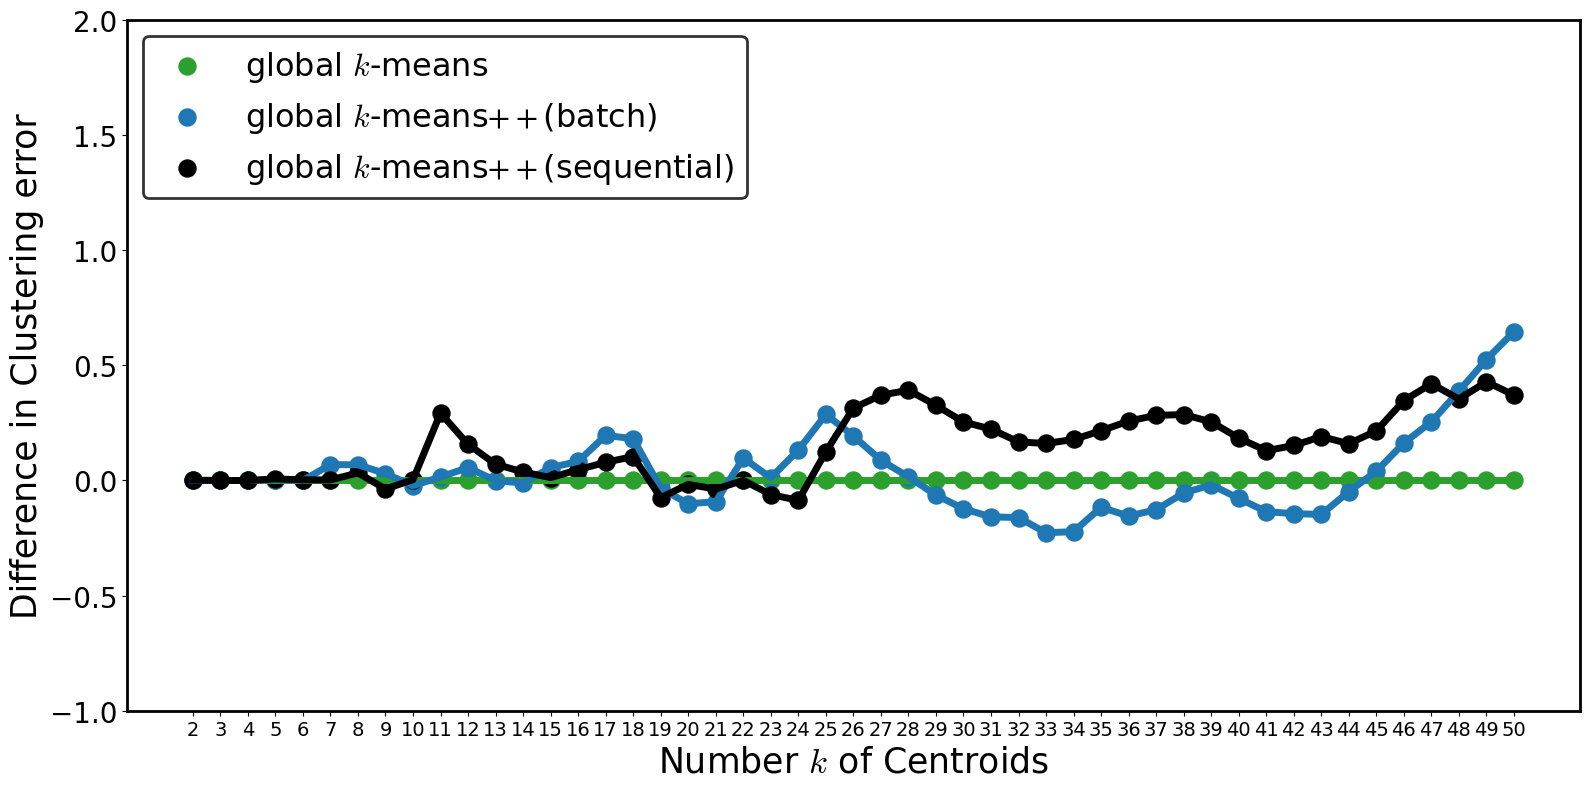

In [3]:

rc('mathtext', fontset = 'cm')
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig, ax1 = plt.subplots(figsize=(16, 8),)


#fig.suptitle("Comparison of k-means seeding algorithms", fontsize=20)

centroids_range = np.arange(2, 51)
# ax1 setting
#ax1.set_yscale("log", base=10)
ax1.set_xticks(ticks=centroids_range)

#ax1.xaxis.set_ticklabels([])
plt.ylim([-1, 2])

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2.0)

linestyle = 'solid'
linewidth = 5
markersize = 150

# Global k-means

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:green")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global['MSE']), label="global $k$-means", s=markersize, c="tab:green")

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global_pp_batch['MSE']), linestyle=linestyle, linewidth=linewidth, c="tab:blue")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global_pp_batch['MSE']), label="global $k$-means$\mathbb{++}$(batch)", c="tab:blue", s=markersize)

ax1.plot(centroids_range, percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']), linestyle=linestyle, linewidth=linewidth, c="black")
ax1.scatter(centroids_range, percentage_error(df_global['MSE'], df_global_pp_sequential['MSE']), label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)

# Global k-means++ batch
#if gl_km_pp:
"""
ax1.plot(centroids_range, cl_df["Gl k-means$++$ sequential"], linestyle=linestyle, linewidth=linewidth, c="black")
ax1.scatter(centroids_range, cl_df["Gl k-means$++$ sequential"], label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)

ax1.plot(centroids_range, cl_df["k-means$++$"], linestyle=linestyle, linewidth=linewidth, c="tab:red")
ax1.scatter(centroids_range, cl_df["k-means$++$"], label="$k$-means$\mathbb{++}$", s=markersize, c="tab:red")

ax1.plot(centroids_range, cl_df['sclb k-means$++$'], linestyle=linestyle, linewidth=linewidth, color="tab:gray", alpha=alpha)
ax1.scatter(centroids_range, cl_df["sclb k-means$++$"], label="scalable $k$-means$\mathbb{++}$", c="tab:gray", s=markersize)

ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
ax1.scatter(centroids_range, cl_df['random'], label="random", s=markersize, c="tab:brown")

    
# Global k-means++ sequential
if gl_km_pp_cand:
    ax1.plot(centroids_range, cl_df["Gl k-means$++$ sequential"], linestyle=linestyle, linewidth=linewidth, c="black")
    ax1.scatter(centroids_range, cl_df["Gl k-means$++$ sequential"], label="global $k$-means$\mathbb{++}$(sequential)", c="black", s=markersize)


# Fast Global k-means
if gl_fast:
    ax1.plot(centroids_range, cl_df["Fast global"], linestyle=linestyle, linewidth=linewidth, c='tab:orange')
    ax1.scatter(centroids_range, cl_df["Fast global"], label="fast global $k$-means", s=markersize,c='tab:orange')

# k-means++
if km_pp:
    ax1.plot(centroids_range, cl_df["k-means$++$"], linestyle=linestyle, linewidth=linewidth, c="tab:red")
    ax1.scatter(centroids_range, cl_df["k-means$++$"], label="$k$-means$\mathbb{++}$", s=markersize, c="tab:red")


# random k-means
if random:
    ax1.plot(centroids_range, cl_df['random'], linestyle=linestyle, linewidth=linewidth,c="tab:brown")
    ax1.scatter(centroids_range, cl_df['random'], label="random", s=markersize, c="tab:brown")


"""
ax1.set_ylabel("Difference in Clustering error", fontsize=25)
ax1.grid(False)
# get the legend object
leg1 = ax1.legend(loc="upper left", framealpha=0.8, fontsize=23)
leg1.get_frame().set_linewidth(2.0)
leg1.get_frame().set_edgecolor("black")

plt.xticks(fontsize=14)
plt.yticks(fontsize=20)

plt.xlabel("Number $k$ of Centroids", fontsize=25)
plt.tight_layout()
plt.show()